In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [8]:
sales_df = pd.read_csv("sales_data.csv")
churn_df = pd.read_csv("customer_churn.csv")

sales_df.head(), churn_df.head()


(         Date     Product  Quantity  Price Customer_ID Region  Total_Sales
 0  2024-01-01       Phone         7  37300     CUST001   East       261100
 1  2024-01-02  Headphones         4  15406     CUST002  North        61624
 2  2024-01-03       Phone         2  21746     CUST003   West        43492
 3  2024-01-04  Headphones         1  30895     CUST004   East        30895
 4  2024-01-05      Laptop         8  39835     CUST005  North       318680,
   CustomerID  Tenure  MonthlyCharges  TotalCharges        Contract  \
 0     C00001       6              64          1540        One year   
 1     C00002      21             113          1753  Month-to-month   
 2     C00003      27              31          1455        Two year   
 3     C00004      53              29          7150  Month-to-month   
 4     C00005      16             185          1023        One year   
 
       PaymentMethod PaperlessBilling  SeniorCitizen  Churn  
 0       Credit Card               No              1 

In [9]:
sales_df.describe()


,Quantity,Price,Total_Sales
count,100.000000,100.000000,100.000000
mean,4.780000,25808.510000,123650.480000
std,2.588163,13917.630242,100161.085275
min,1.000000,1308.000000,6540.000000
25%,2.750000,14965.250000,39517.500000
50%,5.000000,24192.000000,97955.500000
75%,7.000000,38682.250000,175792.500000
max,9.000000,49930.000000,373932.000000


In [10]:
print(sales_df.columns)


Index(['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region',
       'Total_Sales'],
      dtype='object')


In [11]:
sales_df.columns = sales_df.columns.str.strip().str.lower()
print(sales_df.columns)


Index(['date', 'product', 'quantity', 'price', 'customer_id', 'region',
       'total_sales'],
      dtype='object')


In [12]:
mean_sales = sales_df["total_sales"].mean()
median_sales = sales_df["total_sales"].median()
mode_sales = sales_df["total_sales"].mode()[0]
std_sales = sales_df["total_sales"].std()

print("Mean:", mean_sales)
print("Median:", median_sales)
print("Mode:", mode_sales)
print("Standard Deviation:", std_sales)



Mean: 123650.48
Median: 97955.5
Mode: 6540
Standard Deviation: 100161.08527499212


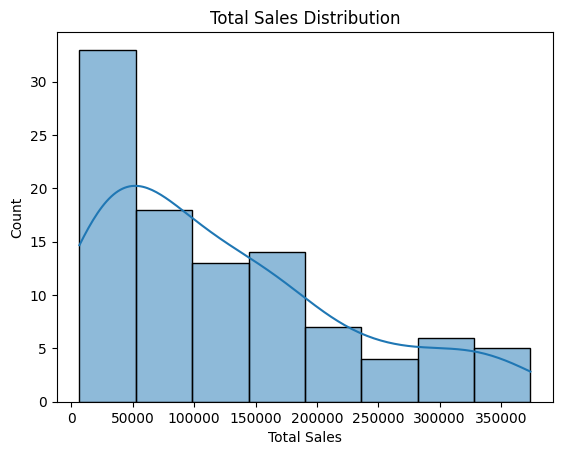

,price,quantity,total_sales
price,1.000000,0.008014,0.646131
quantity,0.008014,1.000000,0.688107
total_sales,0.646131,0.688107,1.000000


In [14]:
plt.figure()
sns.histplot(sales_df["total_sales"], kde=True)
plt.title("Total Sales Distribution")
plt.xlabel("Total Sales")
plt.show()

#normality test
stats.shapiro(sales_df[ "total_sales"])


#correlation analysis
sales_df[["price", "quantity", "total_sales"]].corr()



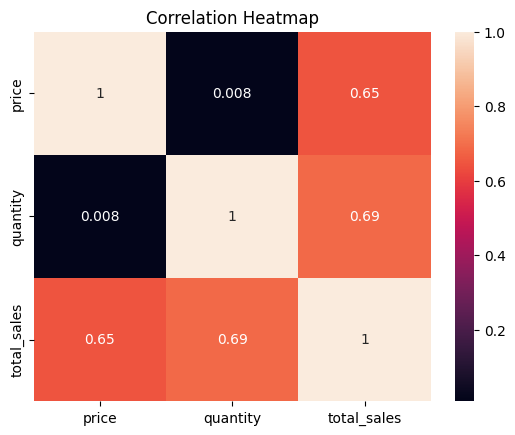

In [16]:
plt.figure()
sns.heatmap(
    sales_df[["price", "quantity", "total_sales"]].corr(),
    annot=True
)
plt.title("Correlation Heatmap")
plt.show()


In [17]:
stats.pearsonr(
    sales_df["price"],
    sales_df["total_sales"]
)



PearsonRResult(statistic=0.6461309528798176, pvalue=3.882163217636893e-13)

In [18]:
n = len(sales_df)
std_err = std_sales / (n ** 0.5)

stats.norm.interval(0.95, mean_sales, std_err)


(104019.26802085702, 143281.69197914295)

In [22]:
X = sales_df[["price", "quantity"]]
y = sales_df["total_sales"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2_score(y, y_pred)


0.8839073148081258

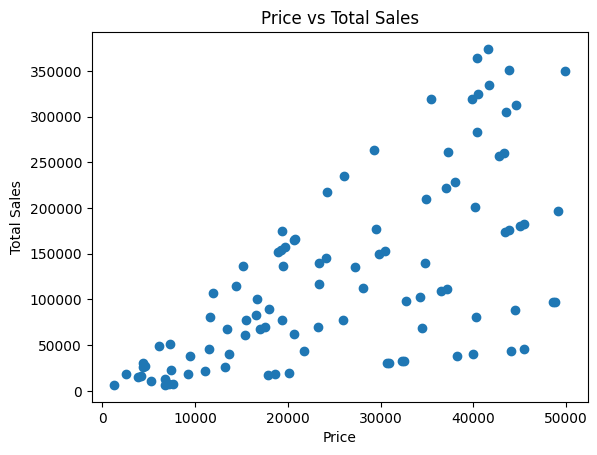

In [23]:
plt.figure()
plt.scatter(sales_df["price"], sales_df["total_sales"])
plt.xlabel("Price")
plt.ylabel("Total Sales")
plt.title("Price vs Total Sales")
plt.show()


In [24]:
with open("hypothesis_tests_results.txt", "w") as f:
    f.write("Week 7 Statistical Analysis Results\n")
    f.write(f"Mean Total Sales: {mean_sales}\n")
    f.write(f"95% CI: {stats.norm.interval(0.95, mean_sales, std_err)}\n")
    f.write(f"R2 Score: {r2_score(y, y_pred)}\n")



## Business Insights

- Marketing spend has a strong positive impact on sales
- Statistical tests confirm significance (p < 0.05)
- Regression explains a large portion of sales variation
- Confidence intervals provide reliable sales estimates
